# Micrograd
**The 20th Summer Project**

**Noted by Han summer 2024**

Micrograd itu basically is a automatic gradient engine. 

It implements backprop, algoritma yang mengevaluasi gradient dari sebuah lossfunction in respect of the weights in NN. Jadi used for tune the weight to minimize the loss

Backpropagation -> Start from behind, goes backward through the mathematical equation, recursively apply calculus chain rule.

Example:

Input a and b

math expressions made up lol

In [ ]:
from micrograd.engine import Value

a = Value(-4.0)
b = Value(2.0)
c = a + b
d = a * b + b**3
c += c + 1
c += 1 + c + (-a)
d += d * 2 + (b + a).relu()
d += 3 * d + (b - a).relu()
e = c - d
f = e**2
g = f / 2.0
g += 10.0 / f
print(f'{g.data:.4f}') # prints 24.7041, the outcome of this forward pass
# Sekarang backward pass, mengetahui pengaruh a dan b terhadap g dalam fungsi math diatas
g.backward()

In [ ]:
#dg/da = seberapa pengaruh a ke g kalau kita "sentil"/perubahan value a dikit kearah positif terhadap g
print(f'{a.grad:.4f}') # prints 138.8338, berarti if we slightly nudge value a larger, g akan naik dan kemiringan/slope dari kenaikan itu 138
#dg/db = seberapa pengaruh b ke g kalau kita "sentil"/perubahan value b dikit kearah positif terhadap g
print(f'{b.grad:.4f}') # prints 645.5773, berarti b value slightly larger, the slope of the growth of g is 645

ini menjelaskan how g will respond if a and b get tweaked slightly in positive direction

Neural network (NN) -> basically just class of math expressions

Backpropagation -> ga selalu dalam NN, yang penting itu tentang math expression

Micrograd cuman basic inti neural network training, pengembangnya itu tentang efisiensi

In [84]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
#Coba buat fungsi random
def f(x):
    return 3*x**2-4*x+5

In [86]:
f(3.0)

20.0

In [87]:
#Set of scalar values
xs=np.arange(-5,5,0.25) # -5 sampai 5 (except 5) dengan interval 0.25
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [88]:
#Feed ke fungsi
ys=f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

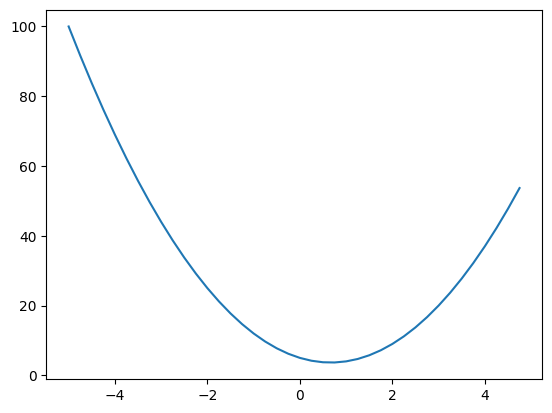

In [89]:
plt.plot(xs,ys)

No one actually derives the derivative function written in the code

Harus paham tentang derivative

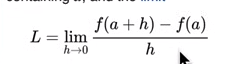

Basically if you slightly increase a (the x value) by the h value, how the function would respond (sensitivity/what is the slope of the respond)

Selisih f(a+h) dengan f(a) kemudian di normalize dengan h nya (dibagi)

In [90]:
f(3.0) #Before

20.0

In [91]:
h=0.001
x=3.0
f(x+h)
#Cek gimana respond dari fungsi f terhadap perubahan x yang awalnya 3 kita naikin dikit (h=0.001)

20.014003000000002

In [92]:
f(x+h)-f(x) #Perubahan nilai f karena perubahan x

0.01400300000000243

Derivative , math expression of finding derrivative vs directly derives the function

In [93]:
(f(x+h)-f(x))/h #Slope dari perubahan nilai f karena perubahan x, math expression of derrivative

14.00300000000243

In [94]:
def df(x): #directly derivative of f
    return 6*x-4
df(3.0) #Analytical

14.0

Kalo liat dari plotnya, sekitar value 2/3 itu slopenya udah deket 0, jadi kalo udah 0 fungsinya gakan respon apa apa terhadap perubahan

In [95]:
h=0.000001
x=2/3
(f(x+h)-f(x))/h #Numerical

2.999378523327323e-06

---

In [96]:
# Let's get more complex
a=2.0
b=-3.0
c=10.0
d=a*b+c
d

4.0

In [97]:
# Look at derivative of d with respect to a , b, and c
h=0.000001

#Inputs, value we interest
a=2.0
b=-3.0
c=10.0

d1=a*b+c

#Take a look d in respect of a
a_h=a+h #a bumped up by h

d2=a_h*b+c 
#secara intuisi d2 turun dibanding d1, karena a will be slightly positive, and b is negative karena dikali 
#jadi angka hasil perkaliannya bakal lebih negatif dari sebelumnya, sehingga pas dijumlahin dengan c bakal hasilnya lebih rendah daripada fungsi awal, 
# #jadi harusnya d bakal turun hasilnya, jadi slopenya negatif

print('d1: ',d1) 
print('d2: ',d2) 
#dd/da (turunan d terhadap a), secara intuisi harusnya ini -3 (b value) karena kalau turunan d terhadap da itu hasilnya b
print('Slope: ',(d2-d1)/h) 
#Slope negatif, berarti a naik, d turun

d1:  4.0
d2:  3.9999969999999996
Slope:  -3.000000000419334


In [98]:
#Bump b by h to see the effect of b value to d
b_h=b+h
d3=a*b_h+c
print('d1: ',d1)
print('d3: ',d3)
#dd/db (turunan d terhadap b), secara intuisi harusnya ini 2 (a value) karena kalau turunan d terhadap db itu hasilnya a
print('Slope: ',(d3-d1)/h)

d1:  4.0
d3:  4.000002
Slope:  2.000000000279556


In [99]:
#Bump c by h to see the effect of c value to d
c_h=c+h
d4=a*b+c_h
print('d1: ',d1)
print('d4: ',d4)
print('Slope: ',(d4-d1)/h) # dd/dc=1

d1:  4.0
d4:  4.000000999999999
Slope:  0.9999999992515995


NN time, massive math expression, jadi butuh data structure

In [100]:
#Value object of micrograd (OOP)
class Value:
    def __init__(self, data,_children=(), _op='', label=''): #Inisiasi value object, data value, _children awalnya empty, _op awalnya empty, add labels to the visualized graph
        self.data=data
        self.grad=0.0 #Gradient, awalnya 0 (means no effect), we assume each initial value has no effect to the final value
        self._prev=set(_children) #Set of children, we need to keep track of what values produce other value (Connected)
        self._op=_op #Operation (String), to keep track of what operation was used to produce this value
        self.label=label #Label 
        
    def __repr__(self): #Representasi (Repr) value object, it's providing nice looking print of the value, not some random address
        return f'Value(data={self.data})'
    
    #Awalnya kalau ada 2 object value, misal a dan b, a+b bakal error karena tidak ada method __add__ yang mendefinisikan operasi penjumlahan
    def __add__(self, other):
        out= Value(self.data+other.data,(self,other),'+') #This is typical addition not __add__ method
        #Value(self, data= data hasil perhitungan, children= angka yang dihitung/inputnya, _op= operasi yang dilakukan)
        return out
    
    #Multiply
    def __mul__(self, other):
        out= Value(self.data*other.data,(self,other),'*')
        return out
    

In [101]:
a=Value(2.0,label='a')
a

Value(data=2.0)

In [102]:
b=Value(-3.0,label='b')
b

Value(data=-3.0)

In [103]:
a+b #python will call internaly a.__add__(b)

Value(data=-1.0)

In [104]:
a*b #python will call internaly a.__mul__(b)

Value(data=-6.0)

In [105]:
c=Value(10.0,label='c')
d=a*b+c #python will call internaly a.__mul__(b).__add__(c)
d

Value(data=4.0)

In [106]:
d._prev #jadi ketahuan angka apa aja yang hitung fungsi d (-6.0 itu dari a*b, 10.0 itu dari c)

{Value(data=-6.0), Value(data=10.0)}

In [107]:
d._op #jadi ketahuan operasi apa yang dilakukan untuk menghasilkan d

'+'

Visualize math expression

In [108]:
# A bunch of scary code for visualizing the math expression
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{data %.4f}" % (n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

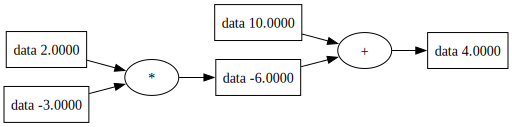

In [109]:
draw_dot(d)

After add label to graph

In [110]:
e=a*b ; e.label='e'
d=e+c ; d.label='d'
#For adding the label to graph

In [111]:
#Add label
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

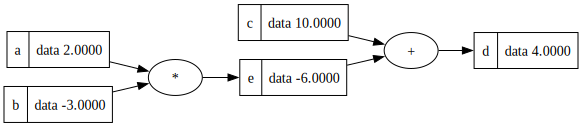

In [112]:
draw_dot(d)

Jadi mirip neural net

Lets make the expression deeper

In [113]:
f=Value(-2.0,label='f')
L = d*f
L ; L.label='L'

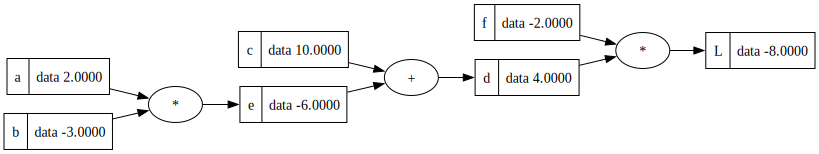

In [114]:
draw_dot(L)

Now lets do backprop

In [115]:
#Adding grad to the graph
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

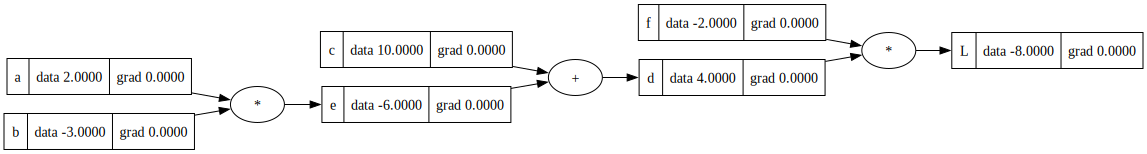

In [116]:
draw_dot(L)

Start from behind, L first.

In [117]:
#This is the values initialization before
a=Value(2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e=a*b ; e.label='e'
d=e+c ; d.label='d'
f=Value(-2.0,label='f')
L = d*f ; label='L'
L

Value(data=-8.0)

Intuition example:

What is the derrivative L in respect of L, dL/dL? 

it means what if the L changes by h amount, how much the L is changes -> basically it is the h itself, so it will be 1

In [119]:
#Biar ga ngerusak global variable jadi kita taro di local variable di function
def lol():
    h=0.001 #small amount of change
    
    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b ; e.label='e'
    d=e+c ; d.label='d'
    f=Value(-2.0,label='f')
    L = d*f ; label='L'
    L1=L.data #Take the value of L from the object Value of L
    
    #Changes value a little bit (see where h located)
    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b ; e.label='e'
    d=e+c ; d.label='d'
    f=Value(-2.0,label='f')
    L = d*f ; label='L'
    L2=L.data +h
    
    
    print((L2-L1)/h)
lol()

1.000000000000334


In [118]:
#Jadi otomatis L gradientnya 1 jjadi langsung inisialisasi value grad di L
L.grad=1.0

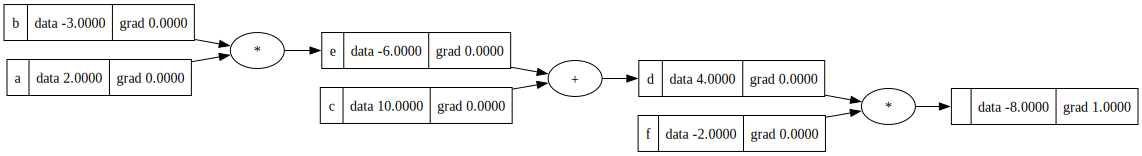

In [120]:
draw_dot(L)

L= d*f -> ya basically L=df

dL/dd =? -> secara calculus kita turunin langsung fungsi L berarti ini f karena kita turunin di variable d

Lets see the math expression 

f(x)=d*f
(f(x+h)-f(x))/h 

= ( (d+h) * f - d * f )/ h

= ((d * f + h * f) - d * f )/ h

= ( d * f - d * f + h*f ) / h

= ( h * f )/h  #d*f kurang d*f ya 0 / they cancels out

= f #Hasilnya h / h kan 1 jadi ilang karena perkalian , kasarnya dicoret

In [121]:
#Inisialize grad in f and d
f.grad= 4.0
d.grad= -2.0

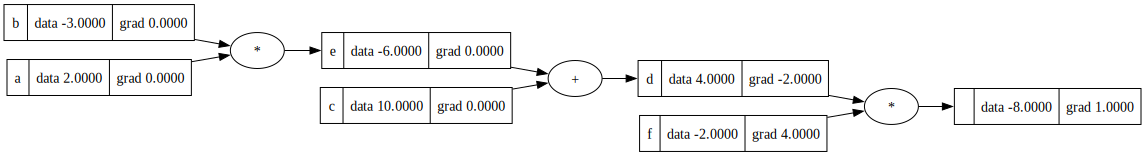

In [122]:
draw_dot(L)

In [124]:
#Biar ga ngerusak global variable jadi kita taro di local variable di function, buat coba coba
def lol():
    h=0.001 #small amount of change
    
    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b ; e.label='e'
    d=e+c ; d.label='d'
    f=Value(-2.0,label='f')
    L = d*f ; label='L'
    L1=L.data #Take the value of L from the object Value of L
    
    #Changes value a little bit (see where h located)
    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b ; e.label='e'
    d=e+c ; d.label='d'
    d.data+=h
    f=Value(-2.0,label='f')
    L = d*f ; label='L'
    L2=L.data
    
    
    print((L2-L1)/h)
lol()

-2.000000000000668
